In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # filtering warning
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
data=pd.read_csv('amazon_prime_titles.csv')

In [10]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [11]:
data.drop(['show_id'],axis=1,inplace=True)
data.drop(['description'],axis=1,inplace=True)

In [12]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [13]:
#cheking for duplicate
data.duplicated().sum()

0

In [14]:
data.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [15]:
data['director'].fillna('Unavailable',inplace=True)
data['cast'].fillna('Unavailable',inplace=True)
data['country'].fillna('Unavailable',inplace=True)
data['date_added']=data['date_added'].ffill()
data['rating']=data['rating'].fillna(data['rating'].mode()[0])

C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\2963635335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unavailable',inplace=True)
C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\2963635335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [16]:
data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [17]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [18]:
data['date_added']=pd.to_datetime(data['date_added'],errors="coerce")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   country       9668 non-null   object        
 5   date_added    9668 non-null   datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9668 non-null   object        
 8   duration      9668 non-null   object        
 9   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [20]:
#top 10 directors with the most directed movies
filterd_directors=data[data['director'] !='Unavailable']
top_directors=filterd_directors['director'].value_counts().head(10)

C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\3123360251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')


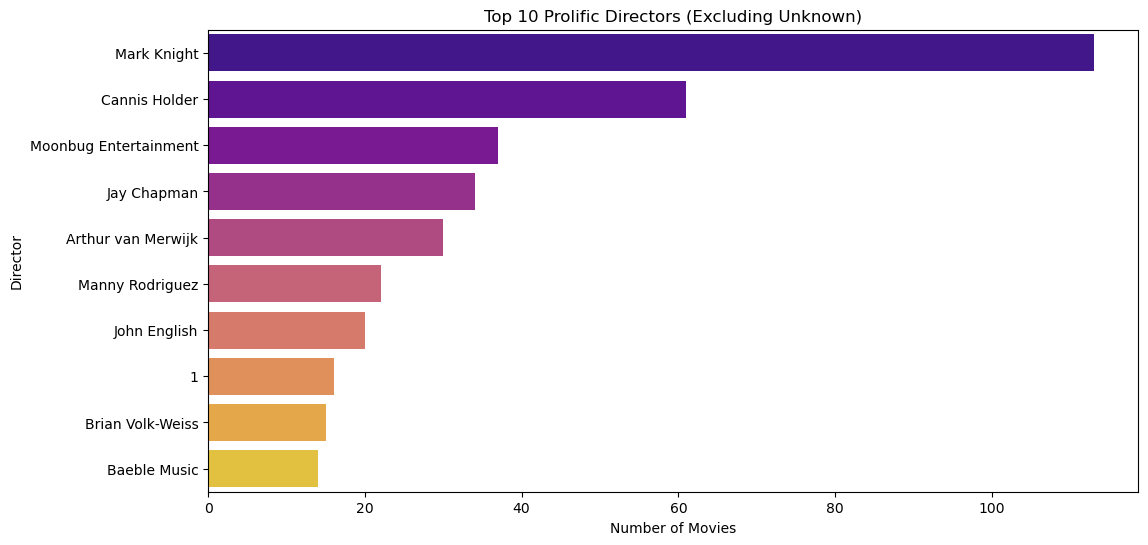

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title('Top 10 Prolific Directors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [22]:
filterd_actors=data[data['cast']!='Unavailable']
top_actors=filterd_actors['cast'].value_counts().head(10)

C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\1640439877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')


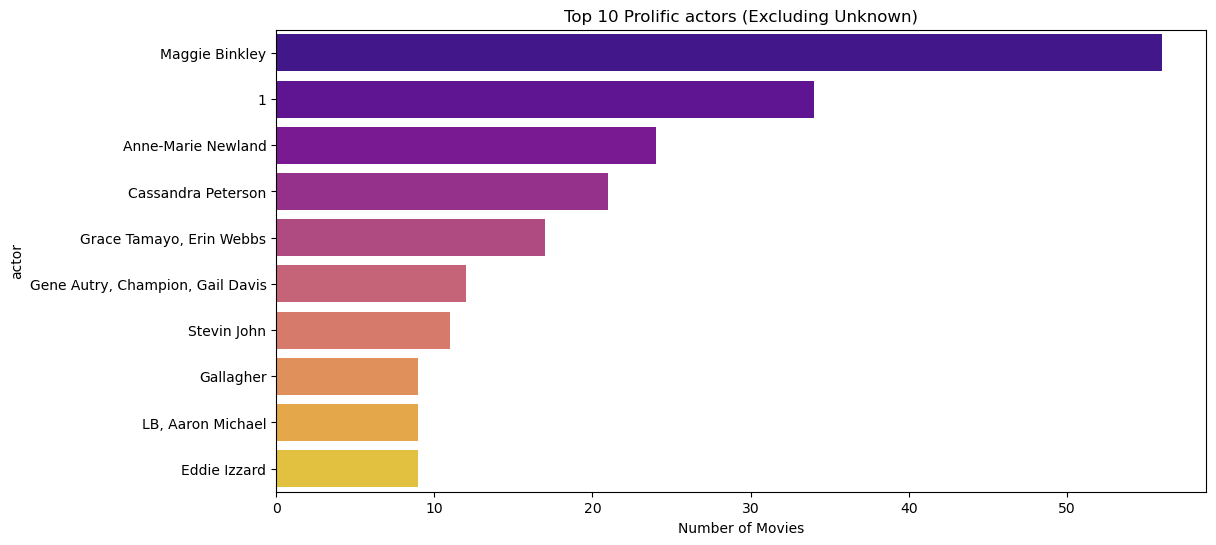

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Prolific actors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('actor')
plt.show()

C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\3827159651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type',palette='viridis')


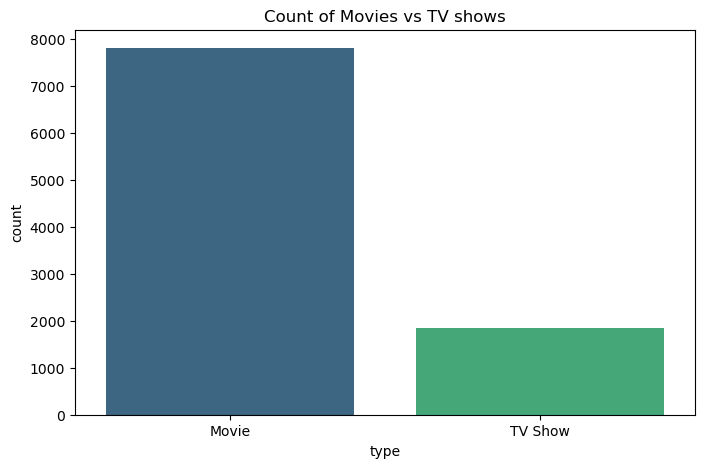

In [24]:
# Count of each content type (Movie vs. TV show)
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='type',palette='viridis')
plt.title('Count of Movies vs TV shows')
plt.show()

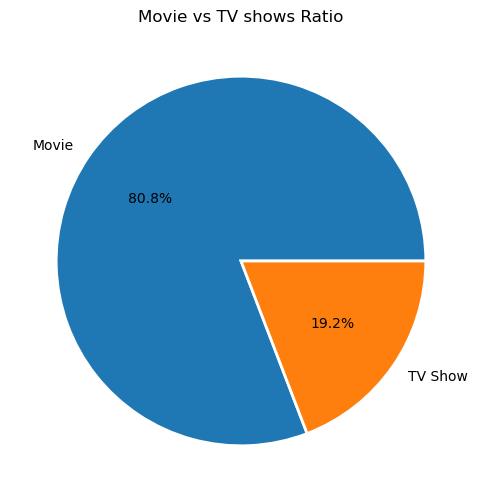

In [25]:
df_pie=data['type'].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',wedgeprops={'linewidth':2.0,'edgecolor':'white'})
plt.title('Movie vs TV shows Ratio')
#plt.Legend(labels={f"(label) ({count})" for label, count in zip(df_pie.index,df_pie.values)],loc='best')
plt.show()

<Axes: xlabel='rating', ylabel='count'>

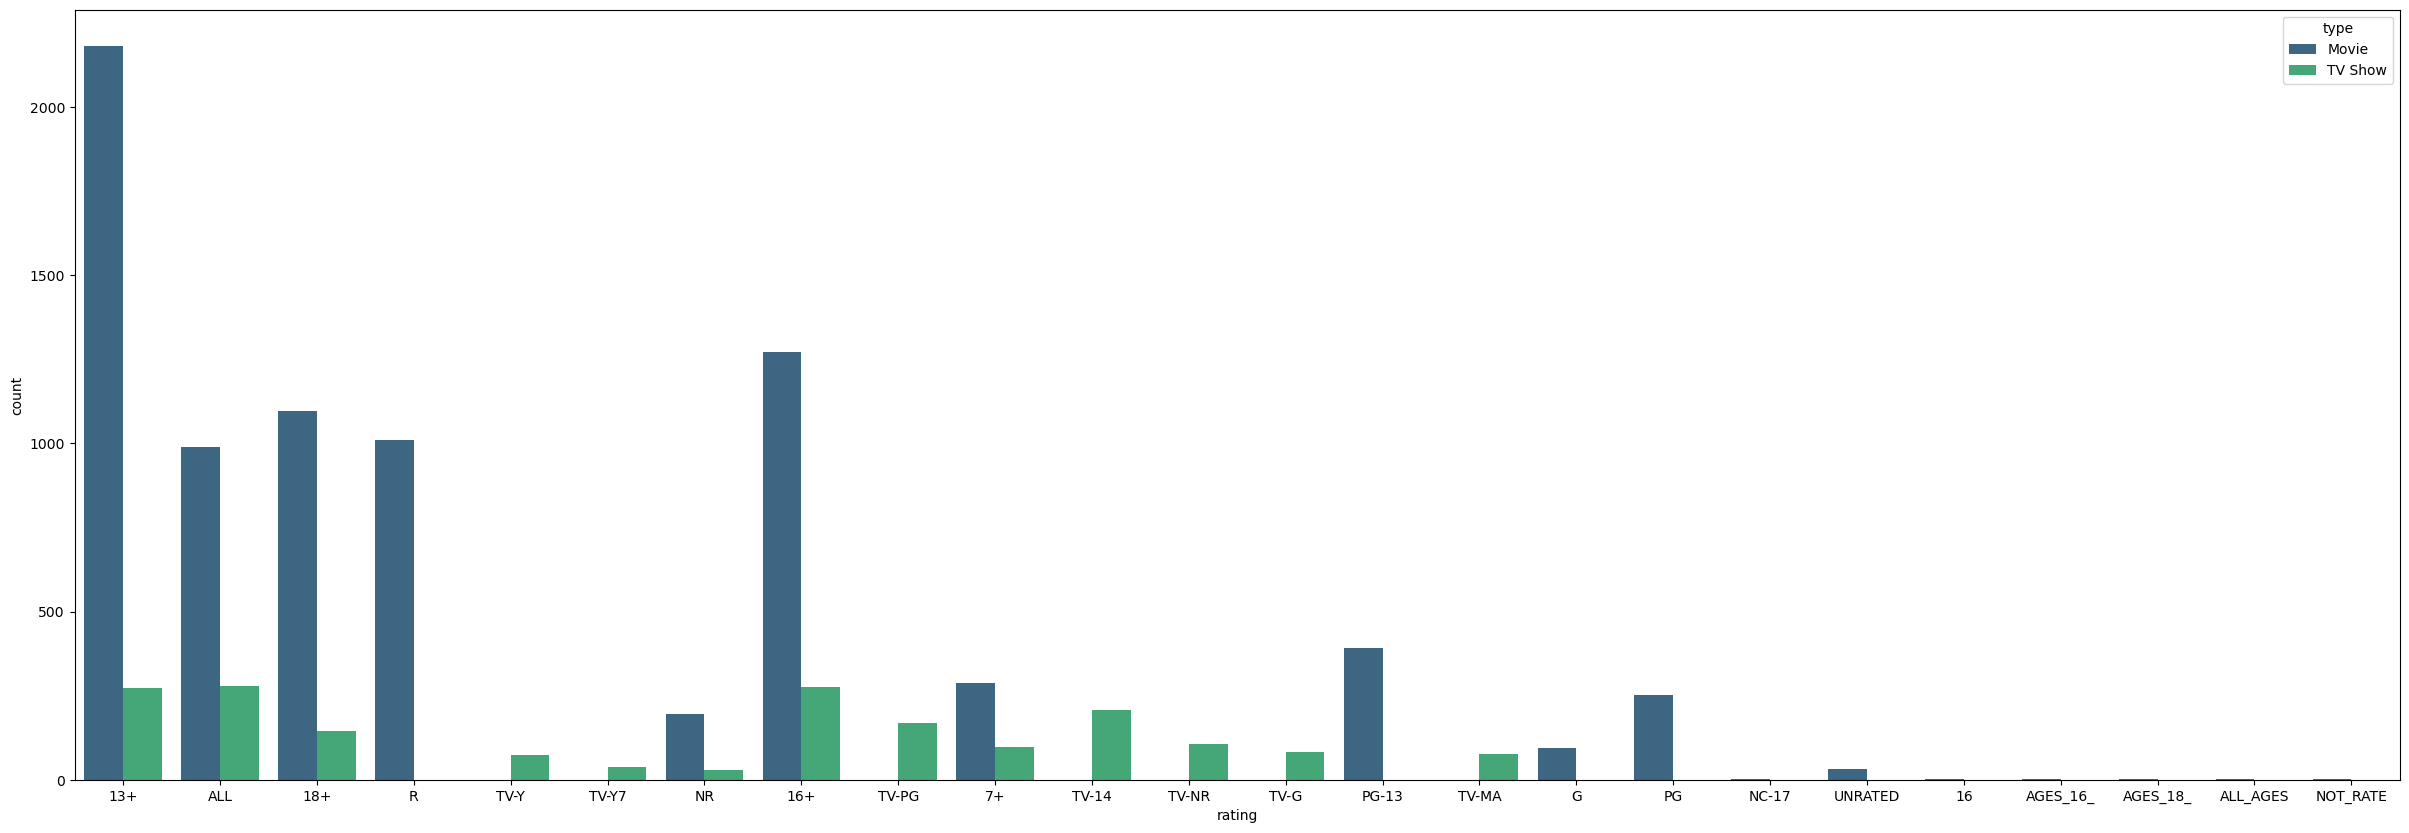

In [26]:
plt.figure(figsize=(30,10))
sns.countplot(x=data['rating'],data=data,hue='type',palette='viridis')

In [27]:
data["rating"].value_counts()

rating
13+         2454
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [28]:
#Calculating the number of titles per country
filtered_country=data[data['country'] !='Unavailable']
country_counts=filtered_country['country'].value_counts()

In [29]:
data.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"


In [30]:
#Getting top 3 countries
top_countries=country_counts.nlargest(3).index

In [31]:
#FIltered the DataFrame to include only the top 3 countries
df_top_countries = filtered_country[filtered_country['country'].isin(top_countries)]

C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\3403112207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_countries, x='country',palette='viridis',order=top_countries)


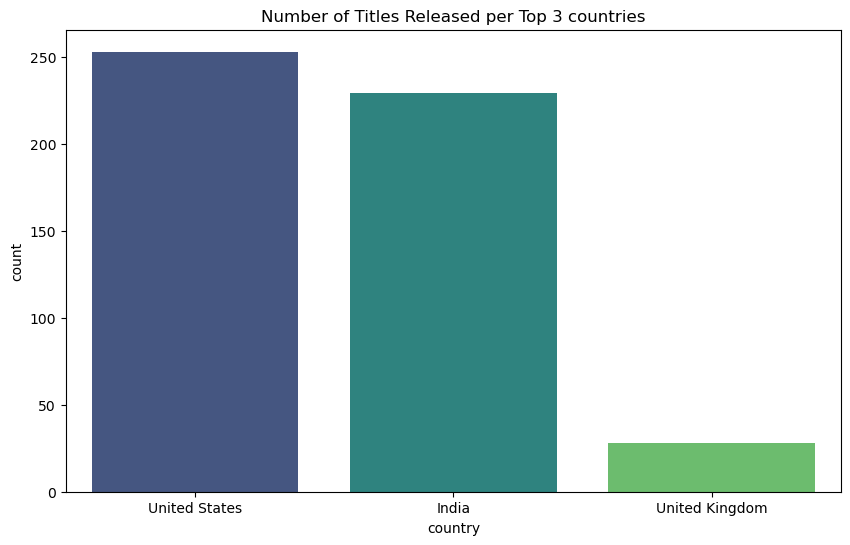

In [32]:
#plotting the number of titles released per top 3 cuntries 
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_countries, x='country',palette='viridis',order=top_countries)
plt.title('Number of Titles Released per Top 3 countries')
plt.show()

In [33]:
#Calculating the number of titles per country
filtered_country=data[data['country'] !='Unavailable']
country_counts=filtered_country['country'].value_counts()

In [34]:
top_countries=country_counts.nlargest(3).index

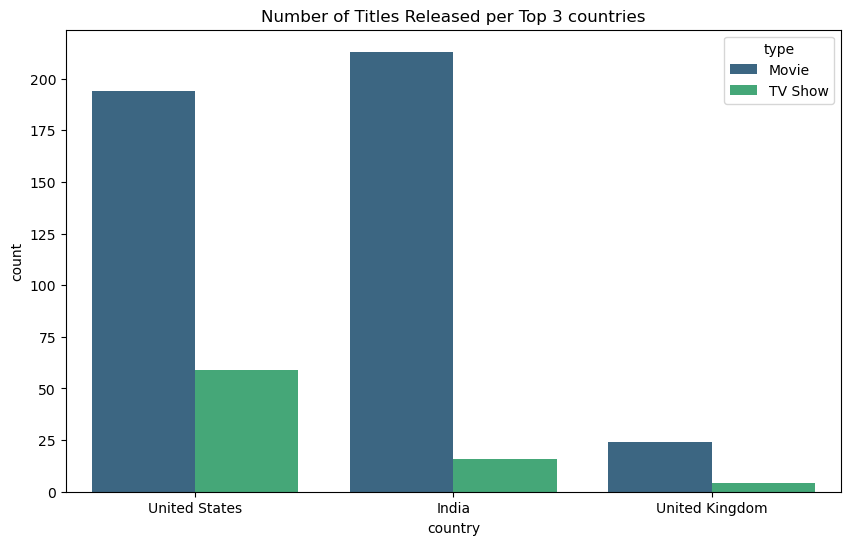

type     country       
Movie    India             213
         United States     194
         United Kingdom     24
TV Show  United States      59
         India              16
         United Kingdom      4
Name: count, dtype: int64

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_countries, x='country',hue='type',palette='viridis',order=top_countries)
plt.title('Number of Titles Released per Top 3 countries')
plt.show()

df_top_countries.groupby("type")["country"].value_counts()

In [36]:
year_counts=data['release_year'].value_counts()

In [37]:
top_years=year_counts.nlargest(10).index

In [38]:
df_top_years=data[data['release_year'].isin(top_years)]


C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\2897478886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_years, x='release_year',palette='viridis',order=top_years)


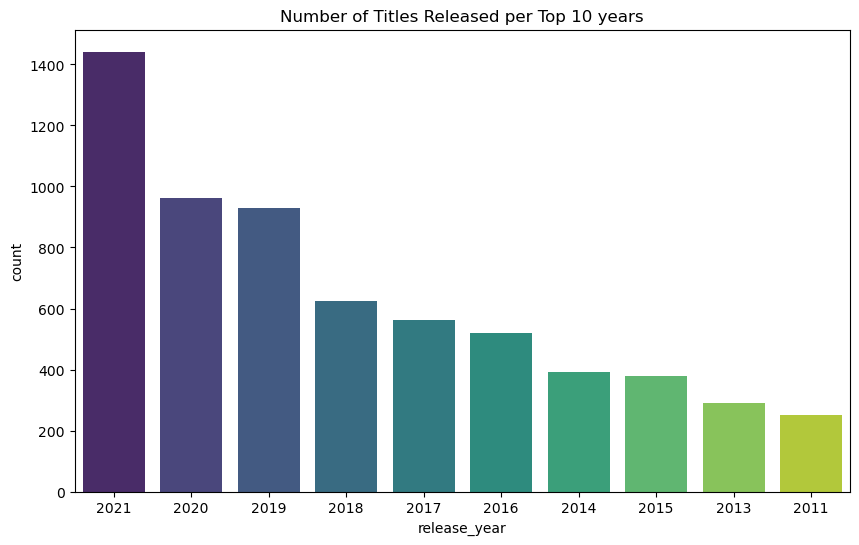

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years, x='release_year',palette='viridis',order=top_years)
plt.title('Number of Titles Released per Top 10 years')
plt.show()

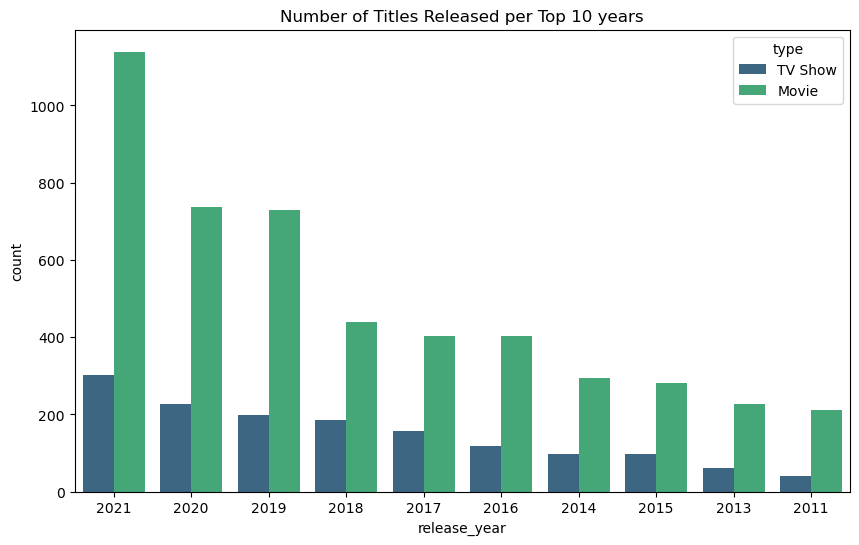

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years, x='release_year',hue='type',palette='viridis',order=top_years)
plt.title('Number of Titles Released per Top 10 years')
plt.show()

In [41]:
#Distribution of genres 
#Splitting  the genres 
data['Genres']=data['listed_in'].apply(lambda x: x.split(', '))


In [42]:
# Exploding the Genres into separate rows
genres_exploded=data.explode('Genres')


C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\3493472504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genres_exploded,y='Genres',order=genres_exploded['Genres'].value_counts().index,


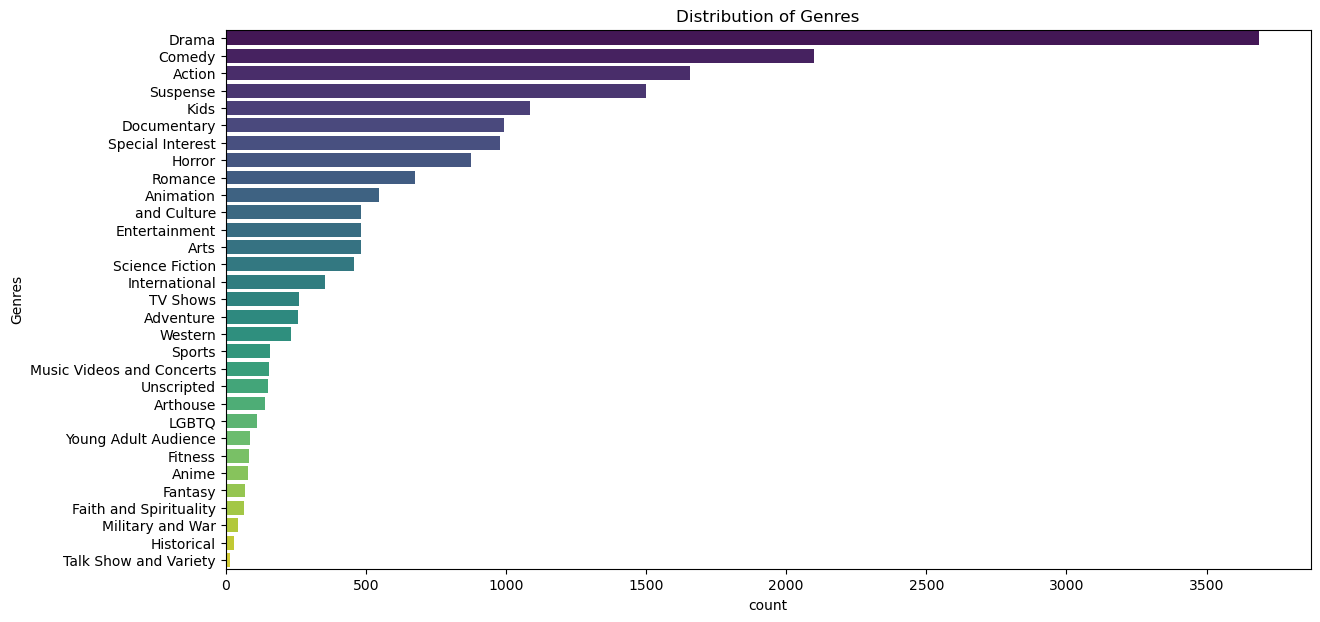

In [43]:
plt.figure(figsize=(14,7))
sns.countplot(data=genres_exploded,y='Genres',order=genres_exploded['Genres'].value_counts().index,
              palette='viridis')
plt.title('Distribution of Genres')
plt.show()

In [44]:
#Filter data for movies and TV shows separtely
df_movies=data[data['type']=='Movie'].copy()
df_tv_shows=data[data['type']=='TV show'].copy()

In [45]:
#Extract numeric duration for movies 
df_movies['duration_num']=df_movies['duration'].str.extract('(\d+)',expand=False).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\1492577085.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_num']=df_movies['duration'].str.extract('(\d+)',expand=False).astype(float)


In [46]:
df_tv_shows['duration_num']=df_tv_shows['duration'].str.extract('(\d+)',expand=False).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\SAM\AppData\Local\Temp\ipykernel_18252\2711413234.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_tv_shows['duration_num']=df_tv_shows['duration'].str.extract('(\d+)',expand=False).astype(float)


In [47]:
#plotting 
plt.figure(figsize=(12,12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

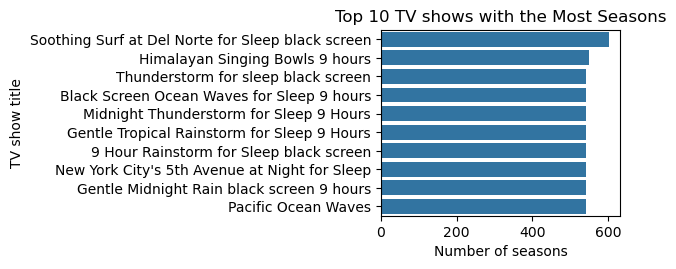

In [48]:
#Subplot 1: TOP 10 longest Movie Duration
plt.subplot(2,1,1)
sns.barplot(data=df_movies.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',
            orient='horizontal')
plt.title('Top 10 longest Movie Durations')
plt.xlabel('Duration(min)')
plt.ylabel('Movie Title')

#Subplot 2: Top 10 TV shows with the most seasons
plt.subplot(2,1,1)
sns.barplot(data=df_tv_shows.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',
            orient='horizontal')
plt.title('Top 10 TV shows with the Most Seasons')
plt.xlabel('Number of seasons')
plt.ylabel('TV show title')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Movie Title')

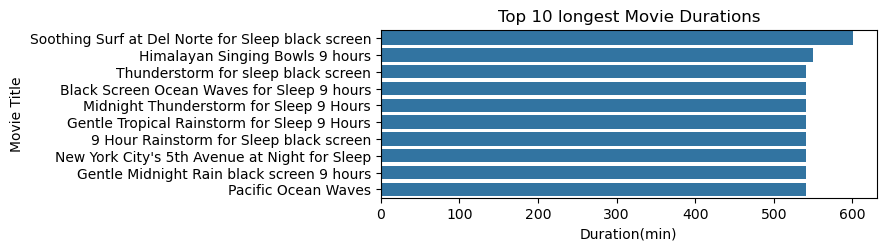

In [49]:
#Subplot 1: TOP 10 longest Movie Duration
plt.subplot(2,1,2)
sns.barplot(data=df_movies.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',
            orient='horizontal')
plt.title('Top 10 longest Movie Durations')
plt.xlabel('Duration(min)')
plt.ylabel('Movie Title')

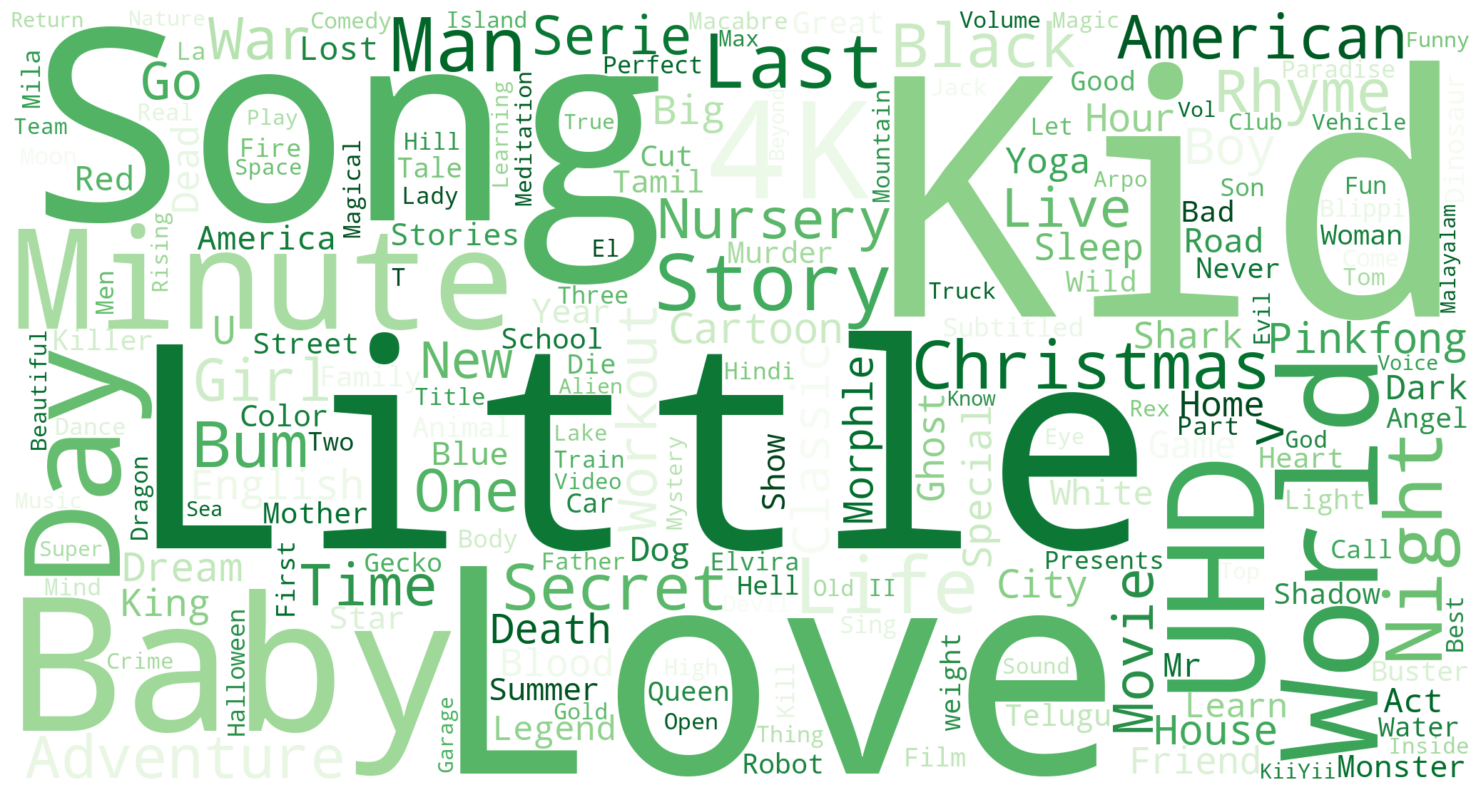

In [50]:
txt1=" ".join (title for title in data.title)

word_cloud1=WordCloud(collocations = False,background_color='white',
                      width=2048,height=1080,colormap='Greens_r').generate(txt1)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud1,interpolation='bilinear')
plt.axis("off")
plt.show()